# Sample Cluster Analysis

### Objective

Look at the overall data in the samples and determine how different each is in terms of protein clusters found within the samples

In [1]:
BASE = "../data"

import os
import sys
import pandas as pd
from itertools import chain
import shelve
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import Counter
from collections import defaultdict
import operator
from functools import reduce
from itertools import combinations
from matplotlib_venn import *
from tailer import tail
%matplotlib inline


sys.path.append('..')

from scripts import utils
from scripts.analysis import build_loci
from scripts.analysis.DBInfo import DBInfo

In [2]:
import datetime
def comp_date(date1, date2, cmp):
    return cmp(datetime.datetime.strptime(date1, '%Y-%m-%d'), datetime.datetime.strptime(date2, '%Y-%m-%d'))

## Get metadata and sample info and protein clusters from previously generated files

See README.md in ../data for details on generating these files

In [3]:
db_info = DBInfo("compil_mgm")
metadata = build_loci.read_metadata(os.path.join(BASE,"comb_meta.csv"))
samples = shelve.open(os.path.join(BASE,"comb.shelve"))
protein_clusters = shelve.open(os.path.join(BASE,"comb_pc.shelve"))

In [4]:
samp_names = ['Mix_1213', 'Mix_1213_N', 'Mix_1213_B', 'Mix_0331', 'Mix_0331_N', 'Mix_0331_B']

for s in samp_names:
    print(s,':\n')
    print('\n'.join(tail( open(os.path.join(BASE,samples[s]['path']),'r'), 11)[:8]) )
    print('\n')

Mix_1213 :

	Proteins	Peptide IDs	Spectra
Unfiltered	604834	109356	2380661
Filtered	922	2655	16982
Forward matches	913	2637	16948
Redundant Forward matches	7038	2637	16948
Decoy matches	9	18	34
Redundant Decoy matches	31	18	34
Forward FDR	0.99	0.68	0.2


Mix_1213_N :

	Proteins	Peptide IDs	Spectra
Unfiltered	638446	109356	2496870
Filtered	651	1615	10361
Forward matches	645	1603	10335
Redundant Forward matches	7002	1603	10335
Decoy matches	6	12	26
Redundant Decoy matches	26	12	26
Forward FDR	0.93	0.75	0.25


Mix_1213_B :

	Proteins	Peptide IDs	Spectra
Unfiltered	981859	218712	4877531
Filtered	1333	3391	27752
Forward matches	1321	3367	27694
Redundant Forward matches	8709	3367	27694
Decoy matches	12	24	58
Redundant Decoy matches	33	24	58
Forward FDR	0.91	0.71	0.21


Mix_0331 :

	Proteins	Peptide IDs	Spectra
Unfiltered	812502	155330	4512358
Filtered	1139	2998	19263
Forward matches	1128	2975	19219
Redundant Forward matches	17284	2975	19219
Decoy matches	11	23	44
Redundant Decoy matches	13	2

In [5]:
for s in samp_names:
    print(s, ":", len(protein_clusters[s]))

Mix_1213 : 1252
Mix_1213_N : 926
Mix_1213_B : 1594
Mix_0331 : 1674
Mix_0331_N : 420
Mix_0331_B : 1738


In [6]:
clusters = {}
for s in samp_names:
    clusters[s] = set(p.cluster_id for p in protein_clusters[s])

## Venn Diagrams to look at the differences in protein clusters between filtering step



/home/mmayers/projects/n15_mice/venv/lib/python3.5/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


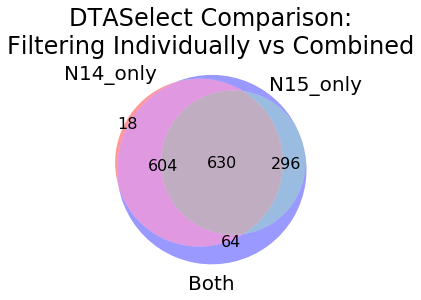

In [7]:
fig = plt.figure()
fig.set_tight_layout(False)
v = venn3([clusters['Mix_1213'], clusters['Mix_1213_N'], clusters['Mix_1213_B']],  ("N14_only", "N15_only", "Both"))
plt.title("DTASelect Comparison:\nFiltering Individually vs Combined", size = 24)
for txt in v.set_labels:
    txt.set_fontsize(20)
for text in v.subset_labels:
    try:
        text.set_fontsize(16)
    except:
        continue

/home/mmayers/projects/n15_mice/venv/lib/python3.5/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


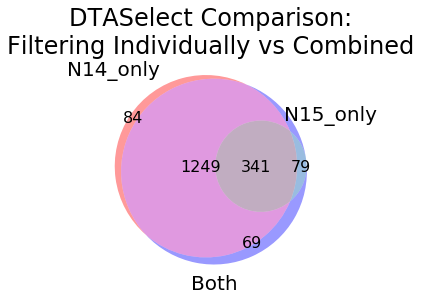

In [8]:
fig = plt.figure()
fig.set_tight_layout(False)
v = venn3([clusters['Mix_0331'], clusters['Mix_0331_N'], clusters['Mix_0331_B']],  ("N14_only", "N15_only", "Both"))
plt.title("DTASelect Comparison:\nFiltering Individually vs Combined", size = 24)
for txt in v.set_labels:
    txt.set_fontsize(20)
for text in v.subset_labels:
    try:
        text.set_fontsize(16)
    except:
        continue